In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers , datasets
import numpy as np
import matplotlib.pyplot as plt

Loading the dataset - CIFAR-10

In [28]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

 Normalizing pixel values

In [29]:
x_train = x_train / 255.0
x_test = x_test / 255.0

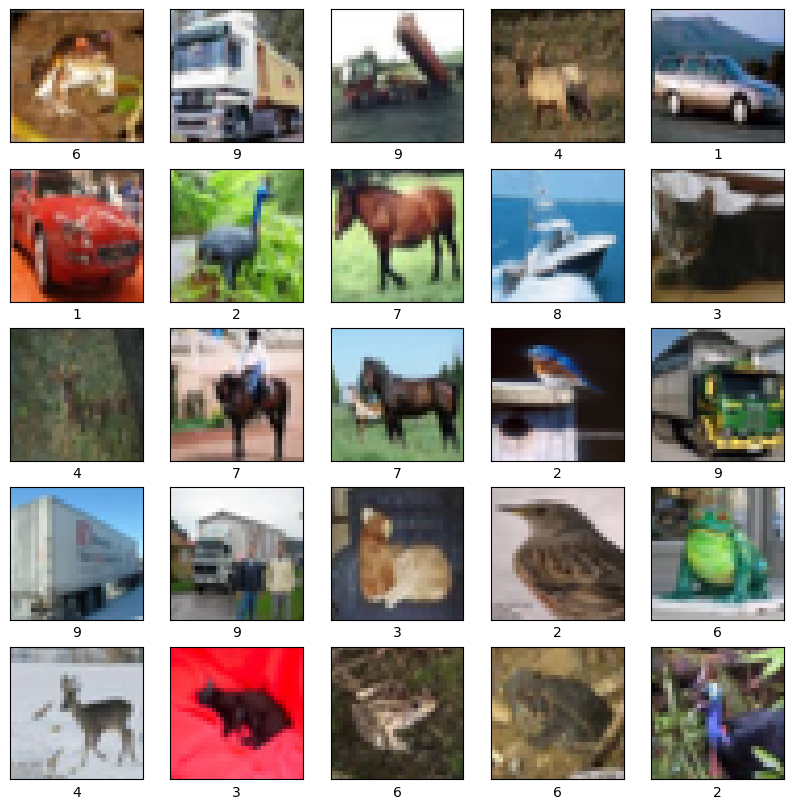

In [30]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(y_train[i][0])

Data Augmentation

In [31]:
data_augmentation = tf.keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
    ]
)

Building CNN

In [32]:
model = tf.keras.Sequential(
    [
        data_augmentation,

        layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        layers.Conv2D(128, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),

        layers.Dense(128, activation="relu"),
        layers.Dropout(0.25),
        layers.Dense(10, activation="softmax"),
    ]
)

c:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])


history=model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

model.evaluate(x_test, y_test)
model.save("cifar10_model.keras")

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 30ms/step - accuracy: 0.3626 - loss: 1.7339 - val_accuracy: 0.4659 - val_loss: 1.4455
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.4728 - loss: 1.4689 - val_accuracy: 0.5550 - val_loss: 1.2518
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 27ms/step - accuracy: 0.5118 - loss: 1.3725 - val_accuracy: 0.5798 - val_loss: 1.1818
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.5333 - loss: 1.3095 - val_accuracy: 0.5901 - val_loss: 1.1354
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.5488 - loss: 1.2726 - val_accuracy: 0.6035 - val_loss: 1.1245
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 165s 81ms/step - accuracy: 0.5637 - loss: 1.2338 - val_accuracy: 0.6298 - val_loss: 1.0482
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 100s 54ms/step - accuracy: 0.5741 - loss: 1.2092 - val_accuracy: 0.6433 - val_loss: 1.0013
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 103s 28ms/step - accuracy: 0.582

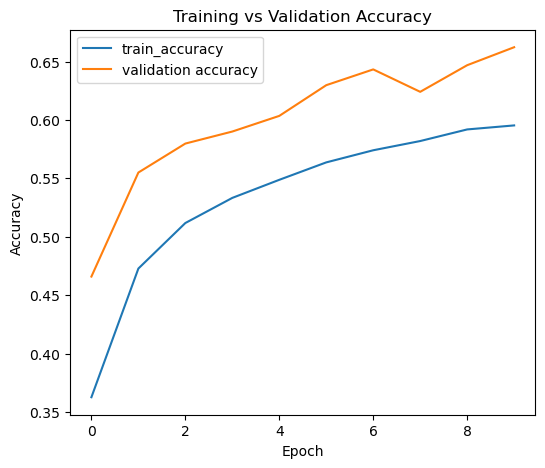

In [34]:
plt.figure(figsize=(6,5))
plt.plot(history.history["accuracy"], label="train_accuracy")
plt.plot(history.history["val_accuracy"], label="validation accuracy")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.show()

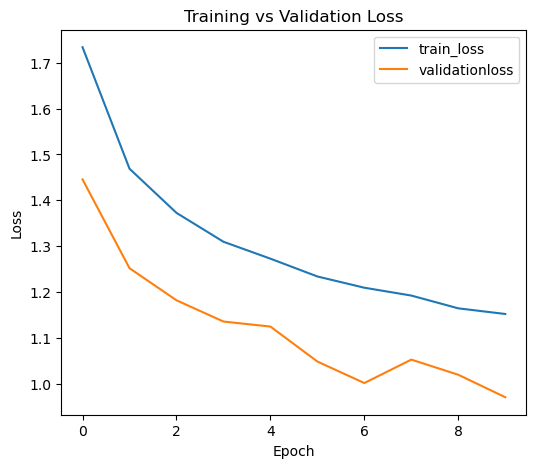

In [35]:
plt.figure(figsize=(6,5))
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="validationloss")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()